In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [34]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

44.57239650865921 -126.09976949866027
18.877688241948505 43.10223667677914
-44.32448930569287 23.34992367709475
19.756214696111357 166.29247912022373
50.688791272550475 21.479600338375064
24.50629268531651 -51.91338065406356
-11.134939221864087 38.03028049286044
35.625296361832326 -173.07217260175955
33.917084856180836 -39.27112504332649
-50.4020469920097 33.76381260742852
45.997038939992336 26.554298789794643
88.49562889325261 84.72366045976014
46.22161090961194 -39.02838597259418
51.236161182052484 -146.29748029652893
-27.761771815564153 58.07257944675561
16.408450111082843 80.08222527288353
-17.636800728480694 38.11475081345657
71.11098863807044 34.26418429557668
60.23477195770741 -6.3226796892082575
-16.504536253136422 67.82058939081628
-35.52451630701154 47.71144239480145
69.86984395047247 99.81187672009565
-4.32483700364314 132.3972386266156
-13.626123591755032 -16.611630064210914
-2.831297968854969 -61.91393832541557
-1.4021360538439467 169.88123232606625
-21.410724514200353 -95

-41.85192679763899 -31.027484693157646
-31.71658256434619 -165.9902448661633
41.296779885967396 -13.979889588496604
43.19126381470943 -100.15562259246364
78.9906089591959 -59.27209754749545
36.94296617610243 145.72324048937287
27.692137304612515 -65.92894227778265
-49.29973587161231 -52.271882619066986
-30.17480838159146 -127.8322758618738
43.72828089044154 -137.61042805246535
24.45442359145852 145.635429754683
-3.5007019424364216 -172.33534423907057
14.406474491354885 2.152459340492669
19.083148628380783 59.268701330684166
-37.30980137998037 84.48611051788652
-86.91393947595888 170.90288457404853
44.0661364457406 165.55950620554006
-23.677013544485405 -97.8802723967746
54.88173413394162 -83.11231596922039
-88.33915697184835 156.7687193579423
-1.0235852618972672 -44.9476160949998
-36.12731277638284 -30.816866583183725
-52.15385491814366 -69.61977012684606
11.694356743365262 -35.75687420973216
-83.80279135942467 -144.16979334289323
-18.972249139470463 140.281411792455
14.889472951089274

48.85711693528981 -170.80672495698903
-37.30103827701612 -54.97385017938731
-8.228758654322704 176.50018040477875
-77.65247671031551 150.38243322703994
-75.33064365644938 -112.55367683508253
24.913690384253442 173.959853430762
-60.9039684053631 -169.1111158918092
-29.528672155316585 -139.280023590152
0.47190140193367824 -158.73021922230066
54.11935619852068 -139.39983758562187
71.85237824729333 29.128350962804035
-80.95437692637678 161.03046660009664
15.789858974724666 114.68258350148324
0.5290977827946364 -34.26829241016475
85.68115333304803 -29.225245875122482
11.238318453191482 -114.68004376060428
-35.125581328235725 -133.62245957773544
-60.65550283454708 -106.77684402215715
21.449561365311467 -18.572348095332018
-1.2016890089028465 111.59851341090314
82.08368668783348 144.02122961168112
39.195495624647236 -169.52701436833996
48.6458175031255 96.44238768291063
-0.8086896116335964 136.13340130514365
-29.88065483020884 51.24653953282751
3.9907436584217493 -160.72346119479417
9.9770769

In [35]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amapa
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | anakapalle
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | agadir
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | san carlos de bariloche
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | leeuwarden
Processing Record 20 of Set 1 | vaiano
Processing Record 21 of Set 1 | manturovo
Processing Record 22 of Set 1 | duque de caxias
Processing R

Processing Record 36 of Set 4 | deputatskiy
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | moerai
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | denpasar
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | patrocinio
Processing Record 44 of Set 4 | sorong
Processing Record 45 of Set 4 | sebinkarahisar
Processing Record 46 of Set 4 | tadine
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | east london
Processing Record 50 of Set 4 | cortez
Processing Record 1 of Set 5 | kalamare
Processing Record 2 of Set 5 | saint-michel-des-saints
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | valpacos
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | georgetown
Proce

Processing Record 24 of Set 8 | bathsheba
Processing Record 25 of Set 8 | shahreza
Processing Record 26 of Set 8 | chisec
Processing Record 27 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 28 of Set 8 | rio gallegos
Processing Record 29 of Set 8 | kahta
Processing Record 30 of Set 8 | biu
Processing Record 31 of Set 8 | tarauaca
Processing Record 32 of Set 8 | kuzovatovo
Processing Record 33 of Set 8 | guangyuan
Processing Record 34 of Set 8 | polson
Processing Record 35 of Set 8 | castro
Processing Record 36 of Set 8 | cracaoani
City not found. Skipping...
Processing Record 37 of Set 8 | buraydah
Processing Record 38 of Set 8 | cam ranh
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | tsentralnyy
City not found. Skipping...
Processing Record 41 of Set 8 | ilave
Processing Record 42 of Set 8 | hanumangarh
Processing Record 43 of Set 8 | nyagan
Processing Record 44 of Set 8 | igarka
Processing Record 45 of Set 8 | dauphin
Processing Record 4

Processing Record 14 of Set 12 | winnemucca
Processing Record 15 of Set 12 | eastbourne
Processing Record 16 of Set 12 | sao jose da coroa grande
Processing Record 17 of Set 12 | barahona
Processing Record 18 of Set 12 | nalut
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | ajdabiya
Processing Record 21 of Set 12 | gushikawa
Processing Record 22 of Set 12 | kahului
Processing Record 23 of Set 12 | eluru
Processing Record 24 of Set 12 | vakhrushev
Processing Record 25 of Set 12 | amalapuram
Processing Record 26 of Set 12 | bo
City not found. Skipping...
Processing Record 27 of Set 12 | sawakin
Processing Record 28 of Set 12 | hohhot
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | hershey
Processing Record 31 of Set 12 | gold coast
Processing Record 32 of Set 12 | idritsa
Processing Record 33 of Set 12 | kysyl-syr
Processing Record 34 of Set 12 | samarai
Processing Record 35 of Set 12 | chicama
Processing Record 36 of Set 12 | s

In [14]:
len(city_data)

563

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amapa,1.0000,-52.0000,77.50,96,90,3.40,BR,2022-07-18 18:36:39
1,Mataura,-46.1927,168.8643,43.48,97,100,0.83,NZ,2022-07-18 18:36:40
2,Anakapalle,17.6833,83.0167,80.55,86,96,8.25,IN,2022-07-18 18:36:40
3,Provideniya,64.3833,-173.3000,42.57,64,100,23.89,RU,2022-07-18 18:36:41
4,Punta Arenas,-53.1500,-70.9167,41.11,75,40,31.07,CL,2022-07-18 18:35:08
5,Torbay,47.6666,-52.7314,79.57,49,40,18.41,CA,2022-07-18 18:36:41
6,Padang,-0.9492,100.3543,76.82,80,22,4.05,ID,2022-07-18 18:36:42
7,Agadir,30.4202,-9.5982,86.45,61,54,4.88,MA,2022-07-18 18:36:42
8,Bethel,41.3712,-73.4140,77.09,91,100,8.05,US,2022-07-18 18:36:43
9,Tuatapere,-46.1333,167.6833,45.45,87,100,1.41,NZ,2022-07-18 18:36:43


In [23]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amapa,BR,2022-07-18 18:36:39,1.0000,-52.0000,77.50,96,90,3.40
1,Mataura,NZ,2022-07-18 18:36:40,-46.1927,168.8643,43.48,97,100,0.83
2,Anakapalle,IN,2022-07-18 18:36:40,17.6833,83.0167,80.55,86,96,8.25
3,Provideniya,RU,2022-07-18 18:36:41,64.3833,-173.3000,42.57,64,100,23.89
4,Punta Arenas,CL,2022-07-18 18:35:08,-53.1500,-70.9167,41.11,75,40,31.07
...,...,...,...,...,...,...,...,...,...
558,Lincoln,US,2022-07-18 18:50:39,40.8000,-96.6670,90.86,57,0,10.36
559,Phan Thiet,VN,2022-07-18 18:51:54,10.9333,108.1000,79.27,84,100,6.69
560,Tungor,RU,2022-07-18 18:52:36,53.3808,142.9564,53.22,97,99,15.14
561,Monticello,US,2022-07-18 18:48:34,45.3055,-93.7941,94.91,49,0,12.66


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

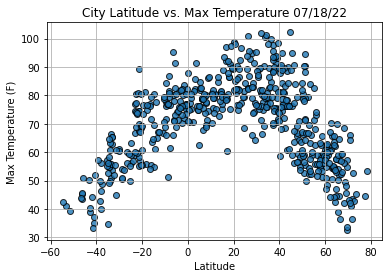

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

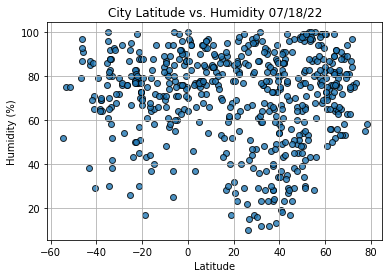

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

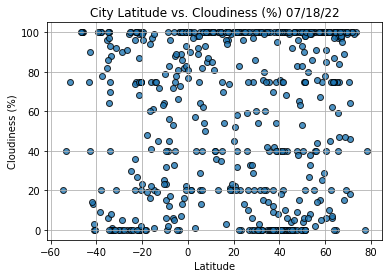

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

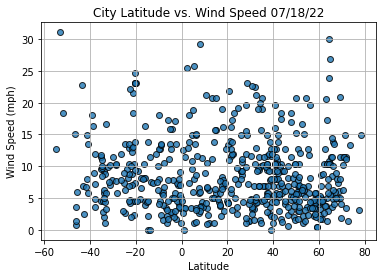

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-07-18 18:35:56
Lat                         -54.8
Lng                         -68.3
Max Temp                    42.46
Humidity                       52
Cloudiness                     20
Wind Speed                  12.66
Name: 13, dtype: object

In [39]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
558     True
559     True
560     True
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amapa,BR,2022-07-18 18:36:39,1.0000,-52.0000,77.50,96,90,3.40
2,Anakapalle,IN,2022-07-18 18:36:40,17.6833,83.0167,80.55,86,96,8.25
3,Provideniya,RU,2022-07-18 18:36:41,64.3833,-173.3000,42.57,64,100,23.89
5,Torbay,CA,2022-07-18 18:36:41,47.6666,-52.7314,79.57,49,40,18.41
7,Agadir,MA,2022-07-18 18:36:42,30.4202,-9.5982,86.45,61,54,4.88


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

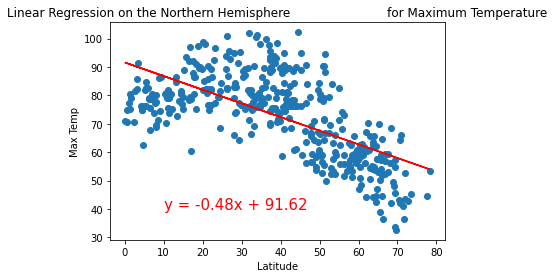

In [42]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

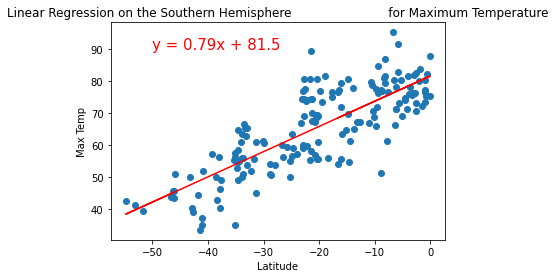

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

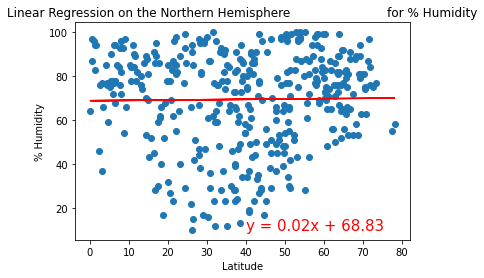

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

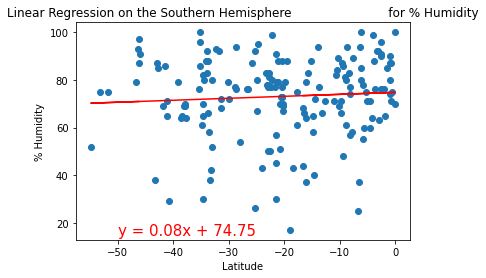

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

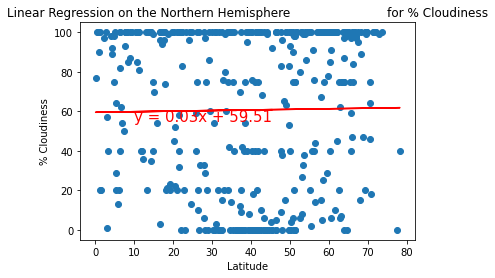

In [47]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

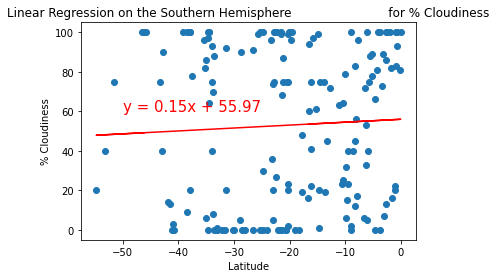

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

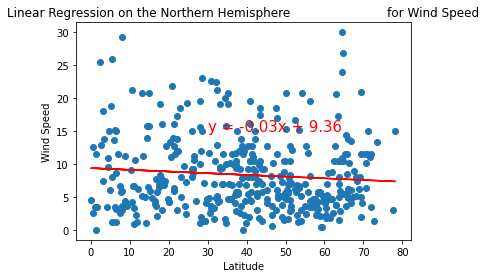

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30, 15))

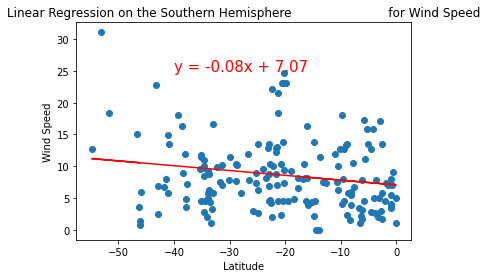

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,25))